# Data Preprocessing

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [25]:
# Function to load specific datasets
def load_dataset():
    # Determine the current working directory
    current_dir = os.getcwd()
    
    # Create the path to the raw_data directory relative to the current directory
    base_dir = os.path.abspath(os.path.join(current_dir, "..", "raw_data"))
    
# Define the path to the All_Airports.csv file
    all_airports_file_path = os.path.join(base_dir, "All_Airports.csv")
    
    # Load the CSV file into a DataFrame
    df = pd.read_csv(all_airports_file_path, compression='zip')
    
    return df

df = load_dataset()


# df = pd.read_csv('/Users/conorjohnston/code/diego-mogollon/lateguru/lateguru/raw_data/Dataset_B_FORWW_Kaggle/All_Airports.csv', compression='zip')

In [26]:
#Inspect DF 

df.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,LateAircraftDelay,Temperature,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr
0,2021-01-01 09:00:00,LAX,JFK,American Airlines Inc.,False,NaN,False,0.0,NaN,NaN,...,NaN,56.0,55.9,1020.32,1020.1,16093.40,0.0,24.97,0.0,0.0
1,2021-01-02 09:00:00,LAX,JFK,American Airlines Inc.,False,NaN,True,2.0,NaN,NaN,...,NaN,54.0,54.0,1025.74,1025.5,16093.40,0.0,24.97,0.0,0.0
2,2021-01-03 09:00:00,LAX,JFK,American Airlines Inc.,False,NaN,True,28.0,28.0,0.0,...,0.0,52.0,52.0,1024.38,1015.2,4828.02,4.6,24.97,0.0,0.0
3,2021-01-03 09:00:00,LAX,JFK,American Airlines Inc.,False,NaN,True,28.0,28.0,0.0,...,0.0,53.0,53.1,1024.38,1024.1,6437.36,4.6,24.97,0.0,0.0
4,2021-01-04 09:00:00,LAX,JFK,American Airlines Inc.,False,NaN,False,0.0,NaN,NaN,...,NaN,51.0,51.1,1023.03,1015.2,6437.36,4.6,24.97,0.0,0.0


### Missing Values

In [27]:
#Select Numbers only
df_num = df.select_dtypes(include='number')
print(df_num.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15144514 entries, 0 to 15144513
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   DepDelayMinutes         float64
 1   CarrierDelay            float64
 2   WeatherDelay            float64
 3   NASDelay                float64
 4   SecurityDelay           float64
 5   LateAircraftDelay       float64
 6   Temperature             float64
 7   Feels_Like_Temperature  float64
 8   Altimeter_Pressure      float64
 9   Sea_Level_Pressure      float64
 10  Visibility              float64
 11  Wind_Speed              float64
 12  Wind_Gust               float64
 13  Precipitation           float64
 14  Ice_Accretion_3hr       float64
dtypes: float64(15)
memory usage: 1.7 GB
None


In [28]:
# Check Missing Values
missing_values = df.isnull().sum()

print(missing_values)

Time                             0
Origin                           0
Dest                             0
Carrier                          0
Cancelled                        0
CancellationReason        14804803
Delayed                          0
DepDelayMinutes             328891
CarrierDelay              11870186
WeatherDelay              11870186
NASDelay                  11870186
SecurityDelay             11870186
LateAircraftDelay         11870186
Temperature                      0
Feels_Like_Temperature           0
Altimeter_Pressure               0
Sea_Level_Pressure               0
Visibility                       0
Wind_Speed                       0
Wind_Gust                        0
Precipitation                    0
Ice_Accretion_3hr                0
dtype: int64


In [29]:
len(df)

15144514

In [30]:
# Display rows with missing values in 'DepDelayMinutes'
missing_dep_delay = df_num[df_num['DepDelayMinutes'].isnull()]
print(missing_dep_delay.head())

     DepDelayMinutes  CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  \
82               NaN           NaN           NaN       NaN            NaN   
171              NaN           NaN           NaN       NaN            NaN   
172              NaN           NaN           NaN       NaN            NaN   
173              NaN           NaN           NaN       NaN            NaN   
174              NaN           NaN           NaN       NaN            NaN   

     LateAircraftDelay  Temperature  Feels_Like_Temperature  \
82                 NaN         58.0                    57.9   
171                NaN         47.0                    46.9   
172                NaN         47.0                    46.9   
173                NaN         46.0                    46.0   
174                NaN         47.0                    46.9   

     Altimeter_Pressure  Sea_Level_Pressure  Visibility  Wind_Speed  \
82              1019.30              1019.2    16093.40         0.0   
171             

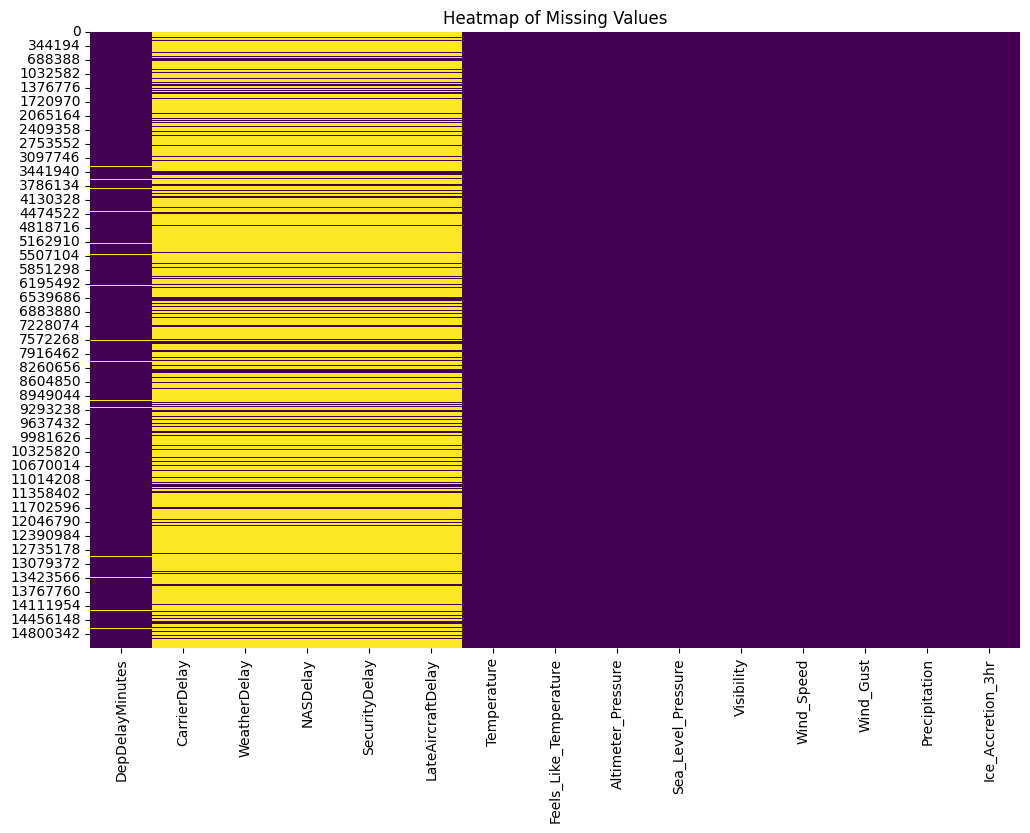

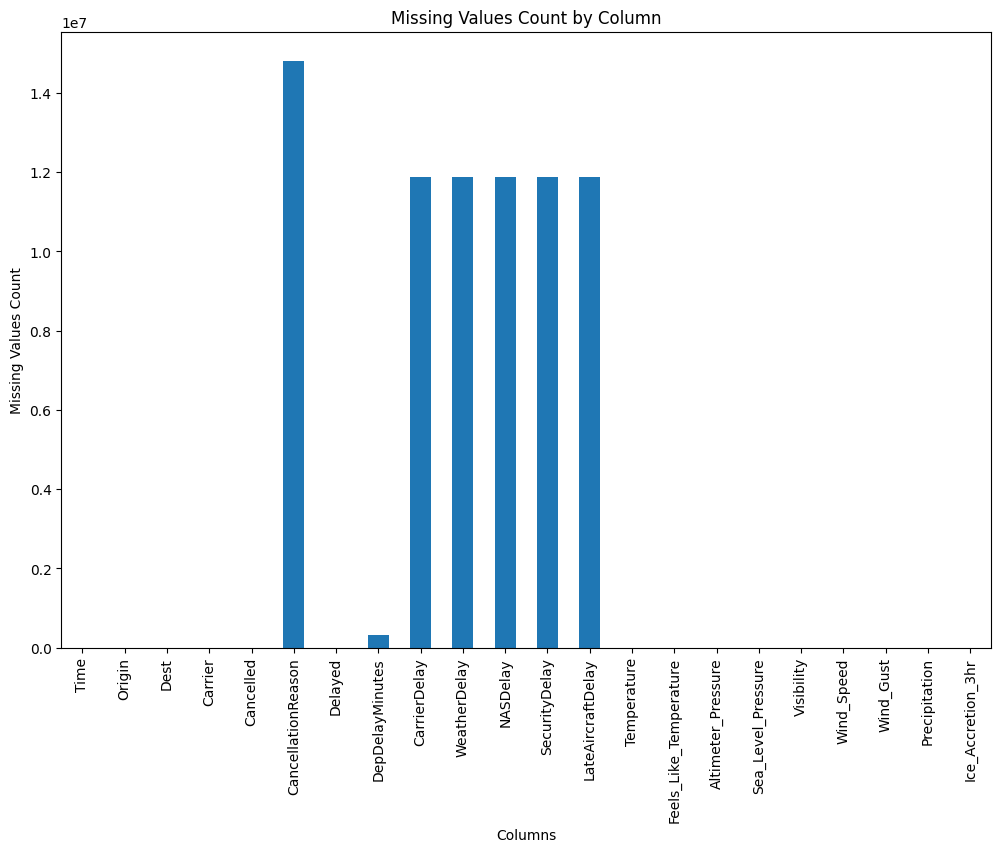

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_num.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

# Bar plot of missing values
missing_values.plot(kind='bar', figsize=(12, 8), title='Missing Values Count by Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.show()